In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

data_path = "insurance.csv"
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
print("Shape of dataset : ", df.shape)
print("Size of dataset : ", df.size)
print("Info of data : ", df.info())

Shape of dataset :  (1338, 7)
Size of dataset :  9366
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Info of data :  None


In [55]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [56]:
x_df = df[["age"]]
y_df = df[["charges"]]
print(x_df.head())
print(y_df.head())
# print(x_df.min(), x_df.max())


   age
0   19
1   18
2   28
3   33
4   32
       charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520


In [57]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(x_df, y_df, test_size=0.3, random_state=20)

model = linear_model.LinearRegression()

model.fit(train_X, train_y)

LinearRegression()

In [58]:
import pickle

model_filename = "linear_regressor.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)
print(f"Model saved to {model_filename}.")

with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded from file.")

Model saved to linear_regressor.pkl.
Model loaded from file.


In [59]:
print(model.score(train_X, train_y))


predicted_test = model.predict(test_X)
print(test_y, predicted_test)
print("Mean square error between test_y and predicted = ", np.mean((predicted_test-test_y)**2))

0.0889607608443741
          charges
698   10976.24575
520   25656.57526
1144   9630.39700
908   15170.06900
559    1646.42970
...           ...
711   10107.22060
20    13228.84695
1250  18648.42170
205    4337.73520
316    8835.26495

[402 rows x 1 columns] [[17743.21087117]
 [16175.58363053]
 [16175.58363053]
 [19572.10931859]
 [ 8076.17622053]
 [ 8076.17622053]
 [ 9905.07466795]
 [16436.8548373 ]
 [18527.02449149]
 [15653.04121698]
 [19310.83811181]
 [10427.6170815 ]
 [ 8598.71863408]
 [16959.39725085]
 [13301.60035601]
 [15914.31242375]
 [13562.87156278]
 [14346.68518311]
 [10427.6170815 ]
 [18265.75328472]
 [19833.38052536]
 [16436.8548373 ]
 [18265.75328472]
 [ 7814.90501375]
 [11733.97311537]
 [10427.6170815 ]
 [16959.39725085]
 [16698.12604407]
 [ 8076.17622053]
 [14607.95638988]
 [14869.22759665]
 [ 9905.07466795]
 [19049.56690504]
 [19833.38052536]
 [16698.12604407]
 [ 9382.5322544 ]
 [10427.6170815 ]
 [ 9382.5322544 ]
 [14346.68518311]
 [10166.34587472]
 [18527.02449149]
 [1

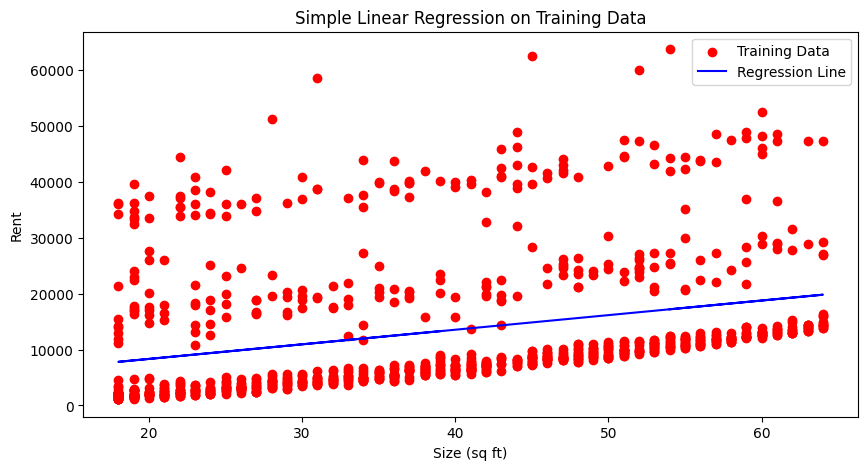

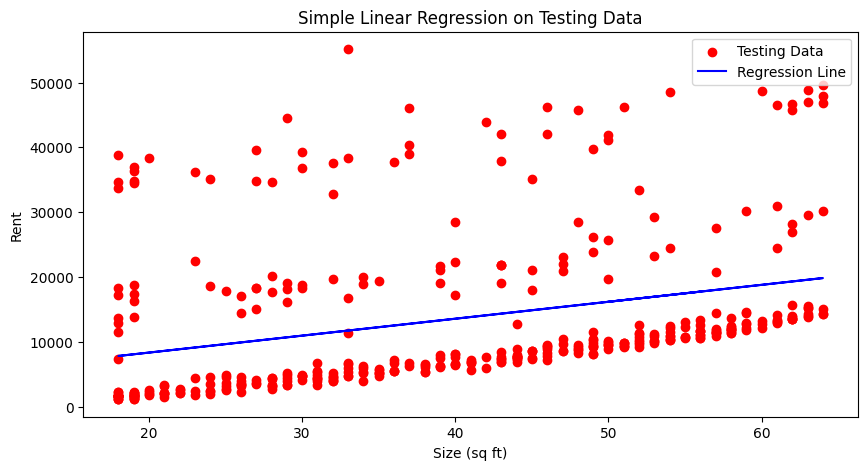

In [60]:
plt.figure(figsize=(10, 5))
plt.scatter(train_X, train_y, color='red', label='Training Data')
plt.plot(train_X, model.predict(train_X), color='blue', label='Regression Line')
plt.title("Simple Linear Regression on Training Data")
plt.xlabel("Size (sq ft)")
plt.ylabel("Rent")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(test_X, test_y, color='red', label='Testing Data')
plt.plot(test_X, predicted_test, color='blue', label='Regression Line')
plt.title("Simple Linear Regression on Testing Data")
plt.xlabel("Size (sq ft)")
plt.ylabel("Rent")
plt.legend()
plt.show()